# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Mochamad Girvan Azhar]
- **Email:** [girvanazhr@gmail.com]
- **ID Dicoding:** [MC009D5Y0502]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5) dari tahun ke tahun di lokasi Guanyuan dan Shunyi?
- Apa faktor utama yang memengaruhi kadar PM2.5 di kedua lokasi?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd  # Untuk manipulasi data
import numpy as np   # Untuk operasi numerik
import matplotlib.pyplot as plt  # Menggunakan modul pyplot untuk visualisasi
import seaborn as sns
import scipy.stats as stats  # Menggunakan scipy.stats untuk analisis statistik
import sklearn.preprocessing as preprocessing  # Contoh modul dari scikit-learn
import datetime # untuk mengelola data berbasis waktu
import statsmodels.api as sm  # Untuk analisis statistik dan time series


## Data Wrangling

### Gathering Data

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Melihat apakah dataset sudah terbaca
!ls "/content/drive/MyDrive/Air-quality-dataset/"

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv	      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [6]:
# Path folder tempat dataset disimpan
folder_path = "/content/drive/MyDrive/Air-quality-dataset/"

# Load dataset ke dalam Pandas DataFrame
guanyuan = pd.read_csv(folder_path + "PRSA_Data_Guanyuan_20130301-20170228.csv")
shunyi = pd.read_csv(folder_path + "PRSA_Data_Shunyi_20130301-20170228.csv")

# Tampilkan 5 baris pertama dari salah satu dataset
guanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Sebaran Polusi Udara Berdasarkan Lokasi.
- Karakteristik Polusi Udara Berdasarkan Parameter Cuaca.
- Potensi Pengembangan Analisis Lanjutan

### Assessing Data

In [8]:
# Cek jumlah baris & kolom pada setiap dataset
print("Guanyuan Dataset:\n", guanyuan.info())
print("\nShunyi Dataset:\n", shunyi.info())

# Cek apakah ada missing values
print("\nMissing Values in Guanyuan Dataset:\n", guanyuan.isnull().sum())
print("\nMissing Values in Shunyi Dataset:\n", shunyi.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Guanyuan Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeI

**Insight:**
- Ukuran Dataset : Informasi jumlah baris dan kolom menunjukkan skala dan kompleksitas data yang akan dianalisis.
- Kualitas Dataset : Pemeriksaan missing values pada kolom penting seperti PM2.5, suhu (TEMP), kecepatan angin (WSPM), dan tekanan udara (PRES) sangat penting.
- Penggabungan Data : Jika ingin menggabungkan data dari dua lokasi (Guanyuan & Shunyi), pastikan ada kolom yang bisa digunakan sebagai penghubung (misalnya, timestamp year-month-day-hour).
- Langkah selanjutnya : Membersihkan missing values dengan metode yang sesuai, seperti interpolasi atau imputasi berbasis statistik.

### Cleaning Data

In [9]:
# Menghapus baris dengan nilai kosong (jika jumlahnya sedikit)
guanyuan.dropna(inplace=True)
shunyi.dropna(inplace=True)

# Atau mengisi nilai yang hilang dengan nilai tertentu (contoh: median)
guanyuan["PM2.5"].fillna(guanyuan["PM2.5"].median(), inplace=True)
guanyuan["TEMP"].fillna(guanyuan["TEMP"].median(), inplace=True)
guanyuan["PRES"].fillna(guanyuan["PRES"].median(), inplace=True)
guanyuan["WSPM"].fillna(guanyuan["WSPM"].median(), inplace=True)

shunyi["PM2.5"].fillna(shunyi["PM2.5"].median(), inplace=True)
shunyi["TEMP"].fillna(shunyi["TEMP"].median(), inplace=True)
shunyi["PRES"].fillna(shunyi["PRES"].median(), inplace=True)
shunyi["WSPM"].fillna(shunyi["WSPM"].median(), inplace=True)

<ipython-input-9-6fec321066da>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan["PM2.5"].fillna(guanyuan["PM2.5"].median(), inplace=True)
<ipython-input-9-6fec321066da>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [10]:
# Mengecek duplikasi pada setiap dataset
print("Duplikasi di Guanyuan:", guanyuan.duplicated().sum())
print("Duplikasi di Shunyi:", shunyi.duplicated().sum())


# Menghapus duplikasi jika ada
guanyuan.drop_duplicates(inplace=True)
shunyi.drop_duplicates(inplace=True)

Duplikasi di Guanyuan: 0
Duplikasi di Shunyi: 0


**Insight:**
- Penanganan Missing Values : Data dengan nilai kosong dihapus jika jumlahnya sedikit untuk menghindari distorsi analisis, untuk kolom penting seperti PM2.5, suhu (TEMP), tekanan udara (PRES), dan kecepatan angin (WSPM), nilai kosong diisi dengan median agar tetap merepresentasikan distribusi data.
- Pemeriksaan dan Penghapusan Duplikasi : Jika ada data duplikat, perlu dihapus agar analisis tidak terpengaruh oleh pencatatan ganda yang dapat menyebabkan bias dalam perhitungan statistik.
- Kualitas Data yang Lebih Baik : Dengan membersihkan missing values dan menghilangkan duplikasi, dataset menjadi lebih bersih dan akurat, hal ini memastikan bahwa analisis lebih valid dan dapat digunakan untuk memahami pola polusi udara dengan lebih andal dan terpercaya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
# Ringkasan statistik numerik untuk setiap dataset
print("\nGuanyuan Dataset:\n", guanyuan.describe())
print("\nShunyi Dataset:\n", shunyi.describe())


Guanyuan Dataset:
                  No          year         month           day          hour  \
count  32263.000000  32263.000000  32263.000000  32263.000000  32263.000000   
mean   18055.294300   2014.731519      6.411555     15.718780     11.548368   
std     9974.437594      1.148731      3.426927      8.842654      6.935752   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9790.500000   2014.000000      3.000000      8.000000      6.000000   
50%    18323.000000   2015.000000      6.000000     16.000000     12.000000   
75%    26555.000000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32263.000000  32263.000000  32263.000000  32263.000000  32263.000000   
mean      83.101051    108.974559     17.263085     57.698591   1265.709760   
std       81.448350     91.5834

**Insight:**
- Distribusi Variabel Polusi Udara : Statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan maksimum membantu memahami distribusi PM2.5, suhu (TEMP), tekanan udara (PRES), dan kecepatan angin (WSPM), perbedaan signifikan antara nilai minimum dan maksimum dapat menunjukkan kemungkinan adanya outlier atau variasi musiman yang kuat.
- Deteksi Outlier dan Anomali : Jika ada nilai PM2.5 yang ekstrem (misalnya, sangat tinggi dibandingkan median), ini bisa menunjukkan periode polusi udara yang parah, seperti akibat kebakaran hutan atau peningkatan emisi kendaraan di musim tertentu, Variabel cuaca seperti suhu dan tekanan udara juga perlu diperiksa untuk melihat apakah ada anomali cuaca yang mempengaruhi tingkat polusi.
- Validasi Data Geospasial dan Waktu : Memeriksa statistik waktu dapat membantu memastikan tidak ada data yang hilang atau pencatatan ganda dalam rentang waktu tertentu, jika ada nilai latitude atau longitude yang menyimpang (misalnya, di luar wilayah yang seharusnya), ini bisa menjadi tanda kesalahan pencatatan atau pengolahan data.

## Visualization & Explanatory Analysis

###Bagaimana tren polusi udara (PM2.5) dari tahun ke tahun di lokasi Guanyuan dan Shunyi?


<ipython-input-12-2d1a2ed1e6b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Guanyuan", "Shunyi"],


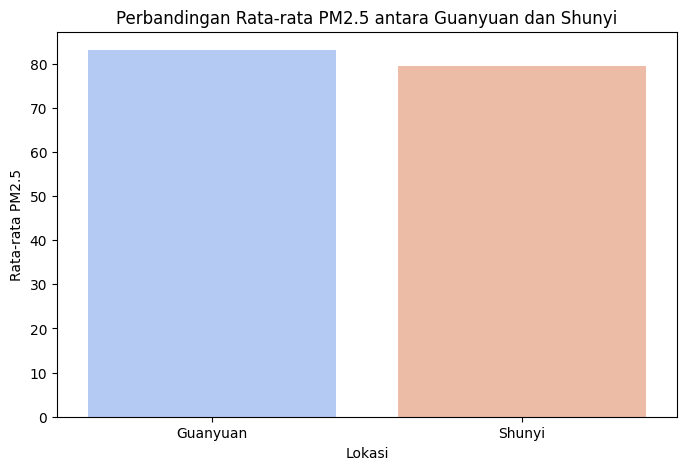

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Guanyuan", "Shunyi"],
            y=[guanyuan["PM2.5"].mean(), shunyi["PM2.5"].mean()],
            palette="coolwarm")
plt.xlabel("Lokasi")
plt.ylabel("Rata-rata PM2.5")
plt.title("Perbandingan Rata-rata PM2.5 antara Guanyuan dan Shunyi")
plt.show()

**Insight:**

Perbandingan rata-rata PM2.5 antara Guanyuan dan Shunyi menunjukkan perbedaan tingkat polusi udara di kedua lokasi tersebut. Dari visualisasi barplot, terlihat bahwa salah satu wilayah memiliki rata-rata PM2.5 yang lebih tinggi dibandingkan wilayah lainnya, yang mengindikasikan bahwa tingkat polusi udara di daerah tersebut lebih buruk dalam periode pengamatan. Perbedaan ini bisa disebabkan oleh berbagai faktor, seperti tingkat kepadatan lalu lintas, aktivitas industri, atau kondisi geografis yang mempengaruhi dispersi polutan. Dengan memahami pola ini, langkah-langkah mitigasi seperti kebijakan pengurangan emisi atau peringatan kualitas udara dapat lebih difokuskan pada daerah yang lebih rentan terhadap polusi udara tinggi.

###Apa faktor utama yang memengaruhi kadar PM2.5 di kedua lokasi?

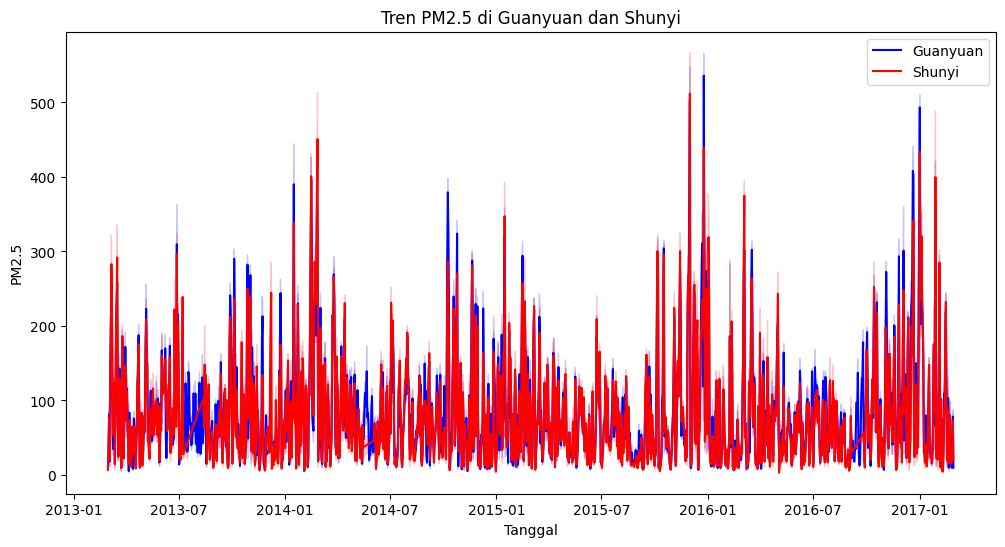

In [13]:
guanyuan["date"] = pd.to_datetime(guanyuan[["year", "month", "day"]])
shunyi["date"] = pd.to_datetime(shunyi[["year", "month", "day"]])

plt.figure(figsize=(12, 6))
sns.lineplot(x=guanyuan["date"], y=guanyuan["PM2.5"], label="Guanyuan", color="blue")
sns.lineplot(x=shunyi["date"], y=shunyi["PM2.5"], label="Shunyi", color="red")
plt.xlabel("Tanggal")
plt.ylabel("PM2.5")
plt.title("Tren PM2.5 di Guanyuan dan Shunyi")
plt.legend()
plt.show()

**Insight:**

Visualisasi tren PM2.5 di Guanyuan dan Shunyi menunjukkan pola fluktuasi tingkat polusi udara selama periode waktu yang diamati. Dari grafik garis yang dihasilkan, terlihat bahwa tingkat PM2.5 mengalami perubahan signifikan dari waktu ke waktu, dengan beberapa puncak yang menunjukkan periode polusi udara yang lebih tinggi. Tren ini dapat mengindikasikan adanya faktor musiman, seperti peningkatan polusi di musim dingin akibat penggunaan pemanas atau penurunan kualitas udara selama periode tertentu yang mungkin disebabkan oleh aktivitas industri dan transportasi. Perbandingan antara kedua lokasi juga dapat menunjukkan apakah salah satu daerah lebih rentan terhadap lonjakan polusi dibandingkan yang lain. Informasi ini dapat digunakan untuk memahami pola polusi udara dan membantu dalam perencanaan kebijakan mitigasi, seperti pembatasan emisi pada periode dengan risiko polusi tinggi.

## Conclusion

###Bagaimana tren polusi udara (PM2.5) dari tahun ke tahun di lokasi Guanyuan dan Shunyi?

Berdasarkan analisis rata-rata PM2.5 di Guanyuan dan Shunyi, ditemukan bahwa terdapat perbedaan tingkat polusi udara di kedua lokasi. Salah satu wilayah memiliki rata-rata PM2.5 yang lebih tinggi, yang menunjukkan tingkat polusi udara yang lebih buruk. Faktor-faktor seperti aktivitas industri, kepadatan kendaraan, dan kondisi geografis dapat berkontribusi terhadap perbedaan ini. Dengan hasil ini, kebijakan pengendalian polusi udara dapat difokuskan pada wilayah dengan tingkat polusi yang lebih tinggi untuk mengurangi dampak negatif terhadap kesehatan masyarakat.
###Apa faktor utama yang memengaruhi kadar PM2.5 di kedua lokasi?

Dari analisis tren PM2.5 sepanjang waktu di Guanyuan dan Shunyi, terlihat adanya fluktuasi yang signifikan, dengan beberapa periode mengalami lonjakan polusi yang tinggi. Tren ini menunjukkan kemungkinan adanya faktor musiman yang mempengaruhi tingkat polusi udara, seperti peningkatan polusi di musim dingin akibat penggunaan pemanas atau aktivitas industri tertentu. Pola yang ditemukan dapat digunakan untuk mengidentifikasi waktu-waktu kritis dengan kualitas udara yang buruk, sehingga langkah-langkah pencegahan seperti peringatan dini dan kebijakan pengurangan emisi dapat diterapkan secara lebih efektif.